# Lesson 8. Input Data Analysis &mdash; Discrete Distributions

### SA421 Fall 2015

In [1]:
# Import randint, chi2 from scipy.stats
from scipy.stats import randint, chi2

# Import histogram function from Matplotlib
from matplotlib.pyplot import hist

# Run Matplotlib magic to show plots directly in the notebook
%matplotlib inline

# Make Matplotlib plots display as SVG files, which are cleaner
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

## The problem

* Every morning, the Simplex Bakery sells [cronuts](http://en.wikipedia.org/wiki/Cronut)  almost exclusively (their coffee tastes awful). The service time for a customer depends on the number of cronuts ordered.


* Below is a list containing the number of cronuts in each of the last 100 orders at the bakery.

In [2]:
y = [1, 3, 5, 9, 1, 5, 6, 6, 3, 5, 8, 2, 9, 6, 3, 5, 9, 5, 4, 8, 5, 4, 3,
       4, 8, 3, 7, 8, 4, 6, 7, 7, 2, 3, 5, 5, 8, 3, 5, 5, 3, 7, 7, 4, 5, 8,
       5, 8, 8, 3, 7, 5, 2, 7, 3, 1, 4, 1, 7, 6, 6, 5, 6, 4, 1, 1, 3, 3, 7,
       3, 1, 9, 3, 8, 2, 6, 4, 1, 5, 6, 9, 8, 3, 8, 8, 4, 9, 5, 4, 2, 7, 2,
       8, 9, 4, 5, 3, 2, 2, 9]

* The owner of the Simplex Bakery suspects that the number of cronuts in each order is uniformly distributed on $\{1,\dots,9\}$ (i.e. only the integers).


* How would you verify this?

Make a histogram! We can use the `hist` function from Matplotlib, which we used back in Lesson 4.

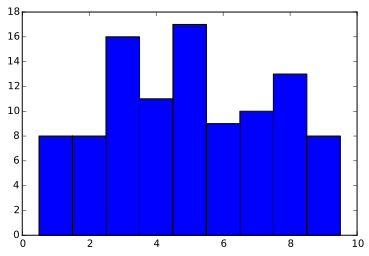

In [3]:
# Create bins for histogram
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Plot histogram
# Right endpoints of intervals are open, except the last interval
# hist() returns multiple objects: the 0th item is the number of 
# observations
o = hist(y, bins, align='left')[0]

* Let's print out the observations &mdash; the number of times we see 0 in the data, the number of times we see 1 in the data, etc.

In [4]:
# Print number of observations
print("o = {0}".format(o))

o = [  8.   8.  16.  11.  17.   9.  10.  13.   8.]


* [Here](http://matplotlib.org/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist) is documentation for `hist()`.


* Based on this, what do you think? Does the owner's idea make sense?


* Let's consider a similar, but more rigorous approach.

## Implementing the chi-squared goodness-of-fit test in Python

* For this problem:
    - $n = 100$
    - $y_0, \dots, y_{99}$ are the observations in the list given above
    - $m = 9$
    - $X$ is a discrete uniform random variable on $\{1,\dots,9\}$
    - $a_0 = 1, a_1 = 2, \dots, a_8 = 9$
    - $p_X(a_i) = 1/9$ for $i = 0,\dots,8$

* $y_0, \dots, y_{n-1}$ are already defined above.


* Let's define $a_0, \dots, a_{m-1}$, $n$, and $m$.

In [5]:
# Define values of proposed random variable X
low = 1
high = 9
a = range(low, high + 1)

# Number of values that the proposed random variable takes
m = len(a)

# Number of observations
n = len(y)

# Print m and n
print("m = {0}".format(m))
print("n = {0}".format(n))

m = 9
n = 100


* To compute the expected number of observations $e_0, \dots, e_{m-1}$, we need the pmf of $X$.


* This can be found in the `randint`  random variable object of `scipy.stats`. [(documentation)](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html)


* In particular, `randint.pmf(x, low, high + 1)` gives the value of $p_X(x)$.
    - Note: to get a discrete uniform random variable that takes on the integers between $c$ and $d$, you must set `high` to $d + 1$ (like you would do with `range()`)

In [6]:
# Compute expected number of observations equal to a[0], ..., a[m-1]
e = [n * randint.pmf(a[i], low, high + 1) for i in range(0,m)]

# Print expected number of observations equal to a[0], ..., a[m-1]
print("e = {0}".format(e))

e = [11.111111111111111, 11.111111111111111, 11.111111111111111, 11.111111111111111, 11.111111111111111, 11.111111111111111, 11.111111111111111, 11.111111111111111, 11.111111111111111]


* Note that $e_i \ge 5$ for $i = 0,\dots,m-1$.


* We obtained the number of observations $o_0, \dots, o_{m-1}$ above with the `hist` function.


* Now we're ready to compute the observed test statistic.

In [7]:
# Compute test statistic
testStatistic = sum([(e[i] - o[i])**2 / e[i] for i in range(0,m)])
print("Test statistic = {0}".format(testStatistic))

Test statistic = 8.72


* Recall that the $p$-value is
$$\Pr\{ \chi^2_{m-1} > t \} = 1 - \Pr\{ \chi^2_{m-1} \le t \}$$


* So, to compute the $p$-value, we need the cdf of a $\chi^2$ random variable with $m-1$ degrees of freedom.


* This can be found in the `chi2`  random variable object in `scipy.stats`. [(documentation)](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html)


* In particular, `chi2.cdf(t, m - 1)` gives the value of $\Pr\{ \chi^2_{m-1} \le t \}$.

In [8]:
# Compute p-value
pValue = 1 - chi2.cdf(testStatistic, m - 1)
print("p-value = {0}".format(pValue))

p-value = 0.36646425757965295


* So, what can we conclude?

Assuming a significance level of 0.05, we do not reject the null hypothesis of the chi-squared goodness-of-fit test. We statistically conclude that the given data does come from a discrete uniform random variable on 1,...,9.

## With a neighbor...

Using a chi-squared goodness-of-fit test with $\alpha = 0.05$, determine whether the 250 observations below come from a Binomial distribution with 5 trials and success probability 0.47. Based on the result of the chi-squared test, what can you conclude?

These might be helpful:

* [Wikipedia entry on the binomial distribution](http://en.wikipedia.org/wiki/Binomial_distribution)
* [Documentation on `binom` in `scipy.stats`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)

In [9]:
y = [3, 3, 4, 1, 3, 1, 2, 1, 1, 3, 4, 1, 4, 3, 3, 0, 1, 3, 2, 1, 3, 3, 3,
       2, 3, 5, 3, 2, 3, 1, 5, 1, 5, 1, 2, 3, 4, 4, 3, 2, 2, 3, 2, 3, 3, 2,
       4, 3, 3, 2, 0, 3, 2, 4, 3, 2, 4, 3, 2, 4, 2, 2, 4, 5, 2, 3, 0, 4, 3,
       1, 2, 1, 3, 2, 4, 4, 2, 3, 3, 2, 5, 3, 2, 1, 3, 2, 1, 3, 3, 1, 4, 2,
       2, 4, 1, 4, 2, 3, 2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 3, 3, 0, 3, 3, 2, 5,
       1, 4, 3, 3, 3, 3, 3, 1, 1, 4, 3, 2, 3, 1, 3, 1, 1, 2, 1, 4, 1, 3, 2,
       5, 3, 2, 1, 4, 3, 1, 2, 5, 1, 4, 1, 0, 3, 4, 4, 4, 5, 1, 3, 2, 4, 1,
       2, 2, 0, 4, 1, 3, 2, 2, 5, 2, 4, 0, 2, 3, 2, 2, 0, 3, 2, 1, 5, 1, 3,
       5, 1, 4, 3, 4, 0, 3, 3, 3, 4, 5, 5, 3, 4, 3, 2, 3, 5, 3, 0, 3, 1, 3,
       3, 5, 2, 2, 3, 4, 2, 0, 1, 3, 4, 1, 2, 2, 3, 3, 3, 2, 1, 2, 4, 2, 3,
       1, 4, 3, 2, 3, 3, 3, 0, 0, 2, 1, 3, 3, 3, 1, 2, 1, 3, 3, 3]

e = [10.454887325000001, 46.356575874999983, 82.217323249999978, 72.909701749999982, 32.327886624999991, 5.7336251749999976]
p-value = 6.173292728628432e-05


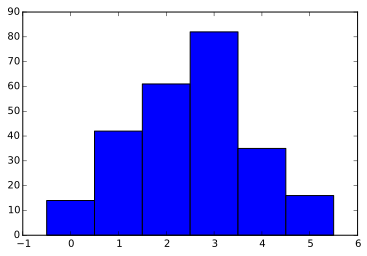

In [10]:
# Import binomial r.v. object from scipy.stats
from scipy.stats import binom

# Create bins for histogram
bins = [0, 1, 2, 3, 4, 5, 6]

# Plot histogram, get number of observations
o = hist(y, bins, align='left')[0]

# Define values of proposed random variable X
binom_n = 5
binom_p = 0.47
a = range(0, binom_n + 1)

# Number of values that the proposed random variable takes
m = len(a)

# Number of observations
n = len(y)

# Compute expected number of observations equal to a[0], ..., a[m-1]
e = [n * binom.pmf(a[i], binom_n, binom_p) for i in range(0,m)]

# Print expected number of observations to check rule of thumb: e[i] >= 5 for all i
print("e = {0}".format(e))

# Compute test statistic
testStatistic = sum([(e[i] - o[i])**2 / e[i] for i in range(0,m)])

# Compute p-value
pValue = 1 - chi2.cdf(testStatistic, m - 1)
print("p-value = {0}".format(pValue))

Since the $p$-value is smaller than our significance level of 0.05, we reject the null hypothesis: the given observations do not appear to be from a Binomial distribution with 5 trials and success probability 0.47.